# 1. Introduction to Word Embeddings

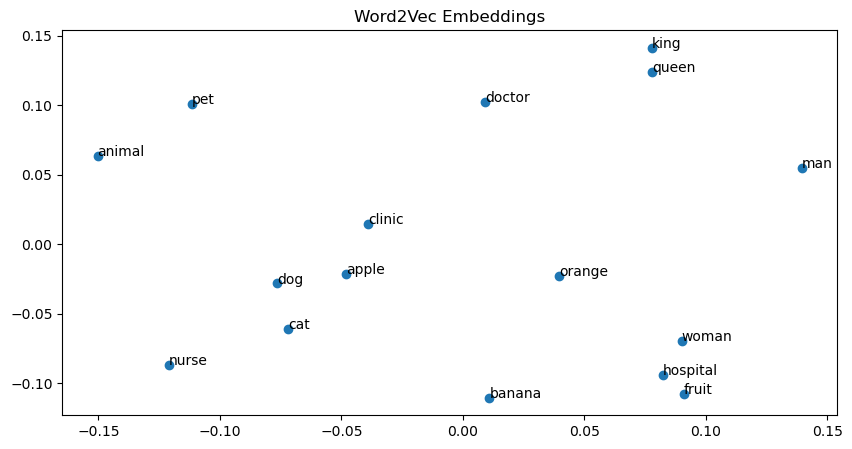

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import numpy as np

# Sample sentences for training word embeddings
sentences = [
    ['king', 'queen', 'man', 'woman'],
    ['doctor', 'nurse', 'hospital', 'clinic'],
    ['apple', 'orange', 'banana', 'fruit'],
    ['cat', 'dog', 'pet', 'animal']
]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)

# Get word vectors
word_vectors = word2vec_model.wv

# Visualize Word2Vec embeddings using PCA
def visualize_embeddings(word_vectors, title):
    words = list(word_vectors.index_to_key)
    X = word_vectors[words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(10, 5))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title(title)
    plt.show()

visualize_embeddings(word_vectors, "Word2Vec Embeddings")


In [16]:
word_vectors['king']

array([ 0.07817571, -0.09510187, -0.00205531,  0.03469197, -0.00938972,
        0.08381772,  0.09010784,  0.06536506, -0.00711621,  0.07710405],
      dtype=float32)

In [17]:
# Compute the vector for king - man + woman
woman_vec = word_vectors['king'] - word_vectors['man'] + word_vectors['woman']

# Find the most similar word to the computed vector
result = word_vectors.similar_by_vector(woman_vec)
print("king - man + woman = ", result)

king - man + woman =  [('woman', 0.6489995718002319), ('king', 0.4918643534183502), ('doctor', 0.3998403251171112), ('hospital', 0.2818007171154022), ('dog', 0.2670990526676178), ('orange', 0.23630291223526), ('clinic', 0.1571488231420517), ('animal', 0.05434016138315201), ('queen', 0.04546244069933891), ('man', 0.03994717076420784)]


# Distance Metrics

In [18]:


# Sample sentences for training word embeddings
sentences = [
    ['king', 'queen', 'man', 'woman'],
    ['doctor', 'nurse', 'hospital', 'clinic'],
    ['apple', 'orange', 'banana', 'fruit'],
    ['cat', 'dog', 'pet', 'animal']
]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)

# Get word vectors
word_vectors = word2vec_model.wv

# Extract vectors for 'king' and 'queen'
king_vector = word_vectors['king']
queen_vector = word_vectors['queen']

# Cosine Similarity
cosine_similarity = dot(king_vector, queen_vector) / (norm(king_vector) * norm(queen_vector))
print("Cosine Similarity:", cosine_similarity)

# Euclidean Distance
euclidean_distance = norm(king_vector - queen_vector)
print("Euclidean Distance:", euclidean_distance)

# Manhattan Distance
manhattan_distance = sum(abs(king_vector - queen_vector))
print("Manhattan Distance:", manhattan_distance)

# Dot Product
dot_product = dot(king_vector, queen_vector)
print("Dot Product:", dot_product)

# Jaccard Similarity (example with sets)
set1 = set(['king', 'man'])
set2 = set(['queen', 'woman'])

jaccard_similarity = len(set1.intersection(set2)) / len(set1.union(set2))
print("Jaccard Similarity:", jaccard_similarity)

Cosine Similarity: 0.70497876
Euclidean Distance: 0.14857878
Manhattan Distance: 0.3732211459428072
Dot Product: 0.025407653
Jaccard Similarity: 0.0


# GloVe Visualization

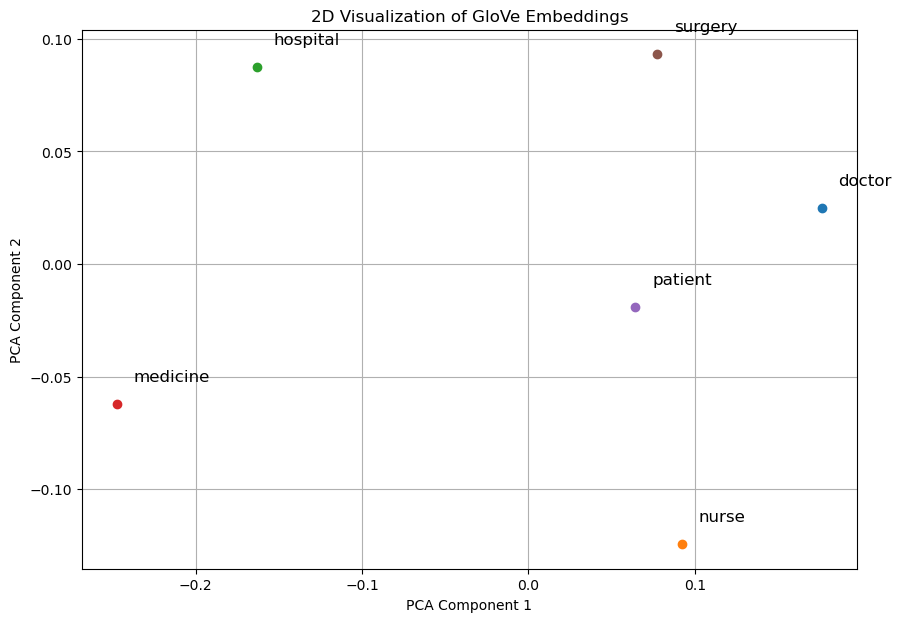

Cosine Similarities between words:
Similarity between doctor and nurse: 0.93
Similarity between doctor and hospital: 0.77
Similarity between doctor and medicine: 0.60
Similarity between doctor and patient: 0.93
Similarity between doctor and surgery: 0.97
Similarity between nurse and hospital: 0.79
Similarity between nurse and medicine: 0.73
Similarity between nurse and patient: 0.99
Similarity between nurse and surgery: 0.94
Similarity between hospital and medicine: 0.95
Similarity between hospital and patient: 0.86
Similarity between hospital and surgery: 0.90
Similarity between medicine and patient: 0.80
Similarity between medicine and surgery: 0.76
Similarity between patient and surgery: 0.97


In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Sample GloVe embeddings for visualization
embeddings_dict = {
    "doctor": [0.2, 0.1, 0.4],
    "nurse": [0.1, 0.2, 0.3],
    "hospital": [0.4, 0.3, 0.2],
    "medicine": [0.3, 0.4, 0.1],
    "patient": [0.2, 0.3, 0.4],
    "surgery": [0.3, 0.2, 0.4]
}

# Convert the embeddings to a numpy array
words = list(embeddings_dict.keys())
embeddings = np.array(list(embeddings_dict.values()))

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=12)

plt.title("2D Visualization of GloVe Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Calculate and print cosine similarities between words
similarities = cosine_similarity(embeddings)
print("Cosine Similarities between words:")
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        print(f"Similarity between {words[i]} and {words[j]}: {similarities[i][j]:.2f}")


# Text Classification Tasks and Methods


In [12]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data for text classification
texts = [
    "This is a spam message",
    "This is another spam message",
    "This is a ham message",
    "This is another ham message"
]
labels = [1, 1, 0, 0]  # 1 for spam, 0 for ham

# Convert texts to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Predict the labels for the same texts (for simplicity)
predictions = clf.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions)
recall = recall_score(labels, predictions)
f1 = f1_score(labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Example usage of the trained model
new_texts = ["This is a new spam message", "This is a new ham message"]
new_X = vectorizer.transform(new_texts)
new_predictions = clf.predict(new_X)

for text, label in zip(new_texts, new_predictions):
    print(f"Text: '{text}' is classified as {'spam' if label == 1 else 'ham'}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Text: 'This is a new spam message' is classified as spam
Text: 'This is a new ham message' is classified as ham


In [14]:
# Example usage of the trained model
new_texts = ["This is not a spam message"]
new_X = vectorizer.transform(new_texts)
new_predictions = clf.predict(new_X)

for text, label in zip(new_texts, new_predictions):
    print(f"Text: '{text}' is classified as {'spam' if label == 1 else 'ham'}")

Text: 'This is not a spam message' is classified as spam
